In [3]:
### libraries required


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import pingouin as pg
from bioinfokit.analys import stat
import statsmodels.graphics.gofplots as sm
from scipy import stats

## Python for Lean Six Sigma - Kruska-Wallis Test

## Problem Statement

## 1. Scenario 
 You are the Continous Improvement Manager of a Distribution Center (DC) for an iconic Luxury Maison focusing on Fashion, Fragrances and Watches.  
 The warehouse receives garments that require final assembling and value-added service (VAS) during the inbound process.  
 For each dress received your operators need to print a label in the local language and perform label sewing.  
 In this article, we will focus on the improvement of label sewing productivity. Labels are distributed to the operators by batches of 30 labels.  
 The productivity is calculated based on the time (in seconds) needed to finish a batch.



## 2. Impact of training your workforce

With the support of the R&D team, you designed training for the VAS operators to improve their productivity and reduce quality issues.

## **Question**

Does the training have a positive impact on the productivity of operators?


## Hypothesis

In [ ]:
Does the training have a positive impact on the productivity of operators?


## Experiment

Randomly select operators and measure the time per batch (Time to finish a batch of 30 labels in seconds) to build a sample of 56 records

### Import Data

In [8]:
# Import Data
df_sewing = pd.read_excel("/Users/deepjeetdatta/Downloads/df_sewing.xlsx")

In [20]:
df_sewing

,Time,Training
0,332,No
1,778,No
2,361,No
3,794,No
4,231,No
5,375,No
6,841,No
7,596,No
8,124,No
9,224,No


In [9]:
df_sewing.head(4)

,Time,Training
0,332,No
1,778,No
2,361,No
3,794,No


In [10]:
# Split in two lists for analysis
train_no, train_yes = df_sewing[df_sewing['Training']=='No'].Training.values, df_sewing[df_sewing['Training']=='Yes'].Training.values

In [11]:
# replace column names
print("{:,} records".format(len(df_sewing)))
df_sewing.head()

56 records


,Time,Training
0,332,No
1,778,No
2,361,No
3,794,No
4,231,No


### Plot distribution using BoxPlot

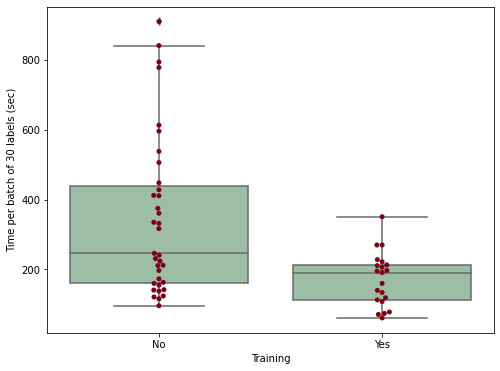

In [12]:
# Visualize distribution by Training Value using BoxPlot

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='Training', y='Time', data=df_sewing, color='#99c2a2')
ax = sns.swarmplot(x="Training", y="Time", data=df_sewing, color='#7d0013')
plt.ylabel('Time per batch of 30 labels (sec)')
plt.show()

Based on the sample data, we can see that the median and the mean of the untrained operators is considerably lower for the operators who had training.  

In [13]:
# df_analysis
df_analysis = df_sewing[df_sewing['Training']=='Yes'].describe()
df_analysis.columns = ['Yes']


In [14]:
df_analysis['No'] = df_sewing[df_sewing['Training']=='No'].describe()
df_analysis.to_csv('df_test.csv')



## 2. Analysis of Variance (ANOVA)

In this scenario, we want to check if the training (Variable X) is impacting the total time per batch (Variable Y).  
Because X is a categorical variable (Training = Yes/No) and Y is numerical, the appropriate method is ANOVA.  
**ANOVA** is a statistical method used to check if we can generalize the difference of means seen in the sample data to the entire population.



###  Step 1: Calculate the  p-value using Welch's test

In [15]:
#perform Welch's ANOVA
pg.welch_anova(dv='Time', between='Training', data=df_sewing).T

,0
Source,Training
ddof1,1
ddof2,45.266971
F,17.106614
p-unc,0.000151
np2,0.173692


### Step 2: Validate the assumptions of ANOVA  
Based on the p-value, we know that the difference of mean is real and not due to random fluctuation.
However, before jumping to a conclusion we need to check that the ANOVA assumptions are satisfied


###  Perform ANOVA

In [16]:
res = stat()
res.anova_stat(df=df_sewing, res_var='Training', anova_model='Time ~ C(Training)')
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(Training),1.0,3.942467e+05,394246.671429,11.350905,0.001398
Residual,54.0,1.875562e+06,34732.621164,NaN,NaN


## Residual Plot

## Assumptions of ANOVA

## Residuals are naturally distributed ??
## There are no outliers or irregularities ??


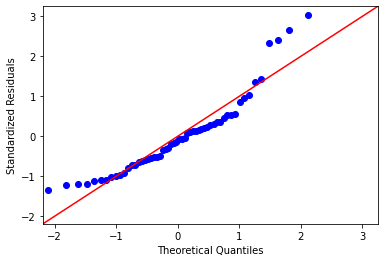

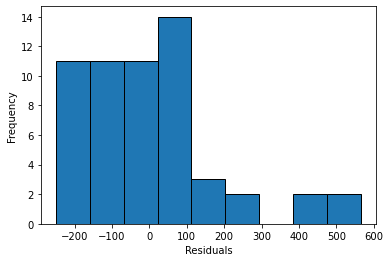

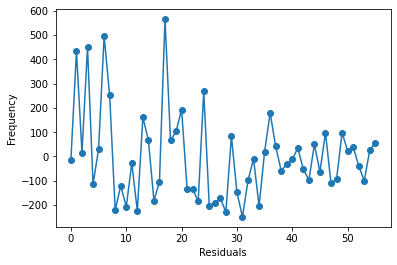

In [17]:
# QQ-plot

# ANOVA model
res = stat()
res.anova_stat(df=df_sewing, res_var='Training', anova_model='Time ~ C(Training)')

# Residual Plot
sm.qqplot(res.anova_std_residuals, line='45')
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()
# histogram
plt.hist(res.anova_model_out.resid, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()
# histogram
plt.plot(res.anova_model_out.resid, '-o')
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

### The graphs show that ANOVA assumptions donot hold

## Kruskal-Wallis test

If your sample data fails to meet ANOVA requirements, you can use Kruskal-Wallis Test to check if the difference of means is due to random fluctuation.

In [18]:
# Perform Kruskal-Wallis Test 
stats.kruskal(train_no, train_yes)

KruskalResult(statistic=54.999999999999986, pvalue=1.205298258444649e-13)

## Conclusion
The p-value is below 5% so we can conclude that the difference of means is statically significant.
We can confirm that the training has a positive impact on the productivity of the operators.